In [ ]:
!pip install pandas

In [ ]:
!pip install networkx

In [ ]:
!pip install matplotlib

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

### Loading our extracted relation file

In [2]:
df = pd.read_json("preparation-relations_token_data.json")

### Massage the data to fit graph model

In [3]:
df.head()

,relations
0,"{'0': [[4, 13, 'SUBJECT', 'benchmark', 'NEW_EN..."
1,"{'0': [[56, 60, 'SUBJECT', 'that', 'NEW_ENTITY..."
2,"{'0': [[5, 9, 'SUBJECT', 'site', 'NEW_ENTITY']..."
3,"{'0': [[3, 6, 'SUBJECT', 'you', 'NEW_ENTITY'],..."
4,"{'0': [[15, 26, 'SUBJECT', 'specialist', 'NEW_..."


In [4]:
df['target'] = df['relations'].apply(lambda x: x['0'][2][3])

In [5]:
df['edge'] = df['relations'].apply(lambda x: x['0'][1][3])

In [6]:
df['source'] = df['relations'].apply(lambda x: x['0'][0][3])

In [7]:
kg_df = df.drop('relations',axis=1)

In [8]:
kg_df.head()

,target,edge,source
0,bond,include,benchmark
1,usd,hedge,that
2,Intermediaries,intend,site
3,message,detect,you
4,universe,cover,specialist


### We nown visualize the elements

In [9]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

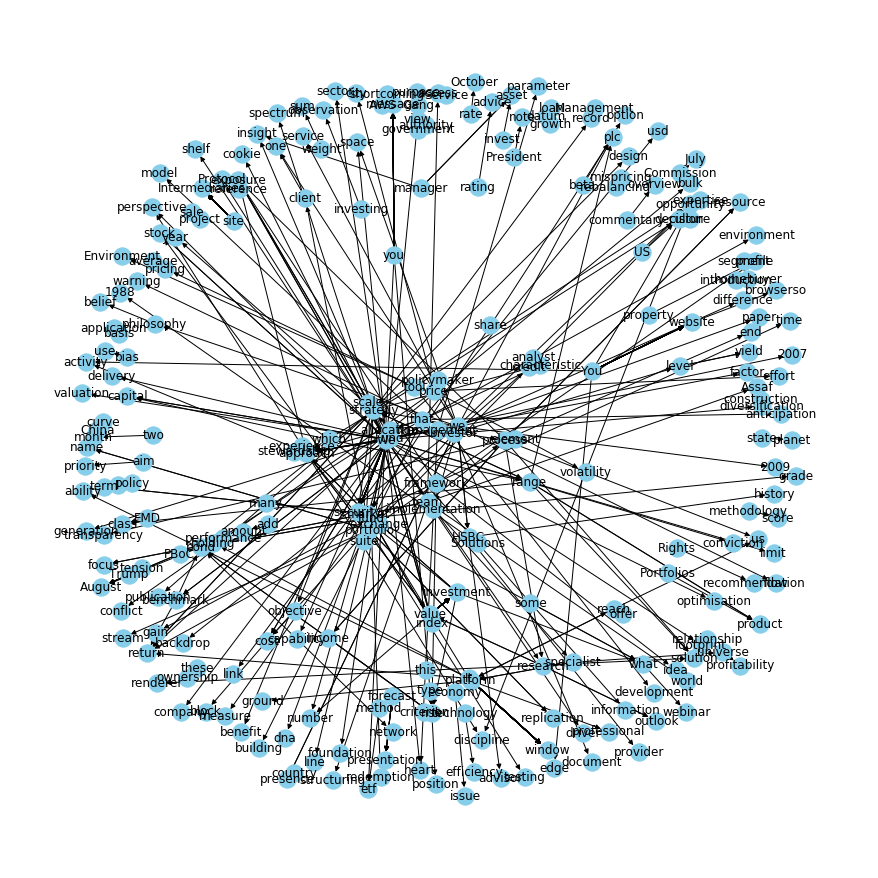

In [10]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### Inspect individual relation like "include"

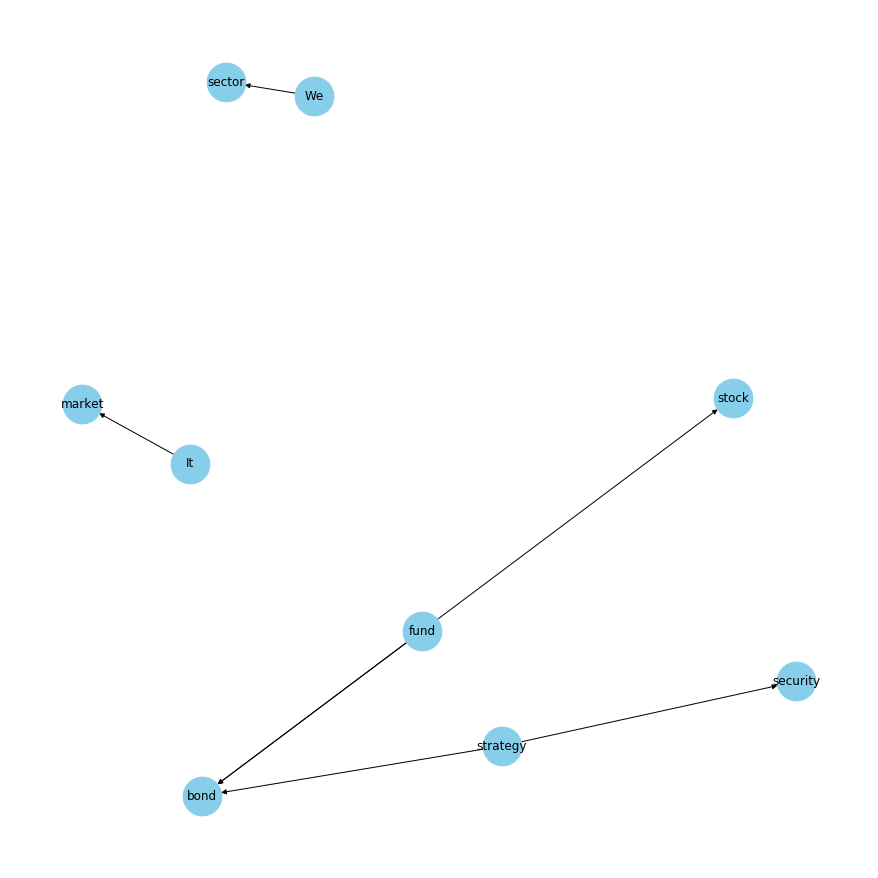

In [15]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="invest"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### we could see instrucments identified related to "invest"

### If more time allowed, the training data output from the generator could be used for model training to generate more relations with the new annotated entities